In [68]:
import pandas as pd 
import matplotlib.pyplot as plt


In [69]:
df = pd.read_csv("P2P/P2P_best_results.csv")
df2 = pd.read_csv("Production/Production_best_results.csv")
df3 = pd.read_csv("Sepsis/Sepsis_best_results.csv")
df4 = pd.read_csv("HelpDesk/HelpDesk_best_results.csv")
dfs = [df, df2, df3, df4]
dfs_names = ["P2P", "Production", "Sepsis", "HelpDesk"]

In [70]:
joint_df = pd.DataFrame()
for df, name in zip(dfs, dfs_names):
    filtered_df = df[(df['Model'] == 'LSTM') & (df['MTL'] == 'EW') & (df['Tasks'] != "('next_activity',)") & (df['Tasks'] != "('next_time',)") & (df['Tasks'] != "('remaining_time',)")]
    filtered_df['Dataset'] = name
    joint_df = pd.concat([joint_df, filtered_df])
joint_df

/var/folders/45/0s1q3ns54cv9jj1ss_41vx2r0000gn/T/ipykernel_81861/3309229944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dataset'] = name
/var/folders/45/0s1q3ns54cv9jj1ss_41vx2r0000gn/T/ipykernel_81861/3309229944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dataset'] = name
/var/folders/45/0s1q3ns54cv9jj1ss_41vx2r0000gn/T/ipykernel_81861/3309229944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Model,MTL,Tasks,Learning Rate,MTL HPO,NEXT_ACTIVITY_mean,NEXT_ACTIVITY_std,NEXT_TIME_mean,NEXT_TIME_std,REMAINING_TIME_mean,REMAINING_TIME_std,Best Epoch_mean,Dataset
68,LSTM,EW,"('next_activity', 'next_time', 'remaining_time')",0.001,NaN,0.864833,0.001450,1.077233,0.073338,4.731500,0.147365,45.666667,P2P
81,LSTM,EW,"('next_time', 'remaining_time')",0.001,NaN,NaN,NaN,1.074633,0.023993,4.383167,0.381718,65.333333,P2P
95,LSTM,EW,"('next_activity', 'remaining_time')",0.001,NaN,0.862333,0.004910,NaN,NaN,4.460533,0.247436,69.000000,P2P
109,LSTM,EW,"('next_activity', 'next_time')",0.001,NaN,0.866767,0.004215,1.083900,0.084139,NaN,NaN,13.666667,P2P
9,LSTM,EW,"('next_activity', 'next_time', 'remaining_time')",0.001,NaN,0.492533,0.021195,1.013233,0.150888,4.771700,0.149305,64.333333,Production
23,LSTM,EW,"('next_time', 'remaining_time')",0.001,NaN,NaN,NaN,1.021267,0.161987,4.710767,0.134162,69.333333,Production
37,LSTM,EW,"('next_activity', 'remaining_time')",0.001,NaN,0.487533,0.010798,NaN,NaN,4.922167,0.225528,67.666667,Production
51,LSTM,EW,"('next_activity', 'next_time')",0.001,NaN,0.520200,0.011233,0.993033,0.159934,NaN,NaN,16.333333,Production
8,LSTM,EW,"('next_activity', 'next_time', 'remaining_time')",0.001,NaN,0.575900,0.011377,1.180100,0.140053,18.577200,1.345837,100.333333,Sepsis
21,LSTM,EW,"('next_time', 'remaining_time')",0.001,NaN,NaN,NaN,1.236867,0.141394,20.061267,1.575073,85.000000,Sepsis


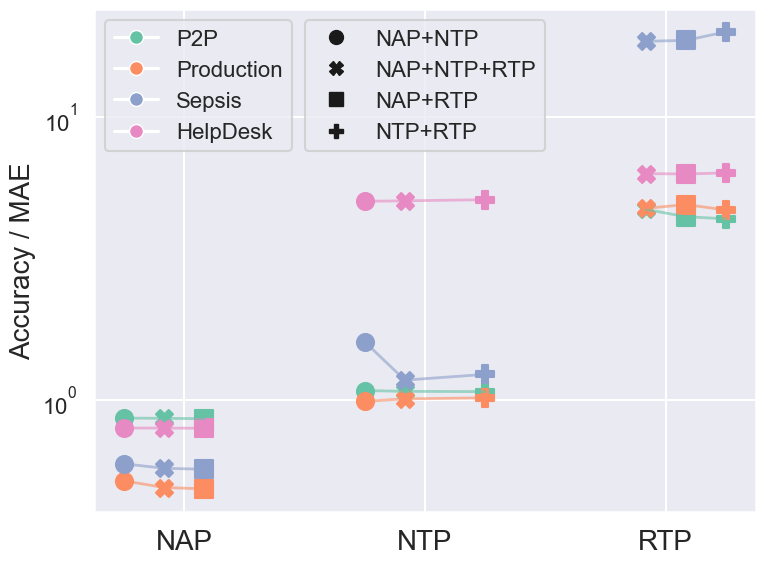

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# === Step 1: Prepare long-form data ===
records = []
for _, row in joint_df.iterrows():
    tasks = row['Tasks']
    dataset = row['Dataset']
    task_combi = ""
    if not pd.isna(row['NEXT_ACTIVITY_mean']):
        task_combi += 'NAP+'
    if not pd.isna(row['NEXT_TIME_mean']):
        task_combi += 'NTP+'
    if not pd.isna(row['REMAINING_TIME_mean']):
        task_combi += 'RTP'
    if task_combi.endswith('+'):
        task_combi = task_combi[:-1]

    if 'next_activity' in tasks and pd.notna(row['NEXT_ACTIVITY_mean']):
        records.append({'Task': 'NAP', 'Score': row['NEXT_ACTIVITY_mean'], 'Combination': task_combi, 'Dataset': dataset})
    if 'next_time' in tasks and pd.notna(row['NEXT_TIME_mean']):
        records.append({'Task': 'NTP', 'Score': row['NEXT_TIME_mean'], 'Combination': task_combi, 'Dataset': dataset})
    if 'remaining_time' in tasks and pd.notna(row['REMAINING_TIME_mean']):
        records.append({'Task': 'RTP', 'Score': row['REMAINING_TIME_mean'], 'Combination': task_combi, 'Dataset': dataset})

plot_df = pd.DataFrame(records)

# === Step 2: Mapping tasks, offsets, and styles ===
task_order = ['NAP', 'NTP', 'RTP']
task_to_x = {task: i for i, task in enumerate(task_order)}

combinations = sorted(plot_df['Combination'].unique())
offsets = np.linspace(-0.25, 0.25, num=len(combinations))
combination_to_offset = dict(zip(combinations, offsets))

# Set color and marker mappings
palette = sns.color_palette("Set2", n_colors=plot_df['Dataset'].nunique())
dataset_to_color = dict(zip(plot_df['Dataset'].unique(), palette))

markers = ['o', 'X', 's', 'P', 'D', '^', '*', '+', 'v', 'x']
combination_to_marker = dict(zip(combinations, markers))

# === Step 3: Plot points manually ===
plt.figure(figsize=(8, 6))
for _, row in plot_df.iterrows():
    base_x = task_to_x[row['Task']]
    offset = combination_to_offset[row['Combination']]
    x = base_x + offset
    y = row['Score']
    color = dataset_to_color[row['Dataset']]
    marker = combination_to_marker[row['Combination']]
    plt.scatter(x, y, color=color, marker=marker, s=150)

# === Step 4: Custom legends ===
# Dataset legend (colors)
dataset_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=ds)
    for ds, color in dataset_to_color.items()
]

# Combination legend (markers)
combination_handles = [
    Line2D([0], [0], marker=marker, color='k', linestyle='None', markersize=10, label=comb)
    for comb, marker in combination_to_marker.items()
]

# === Step 5: Axes and styling ===
plt.xticks(list(task_to_x.values()), list(task_to_x.keys()), fontsize=20)
plt.yscale('log')
plt.ylabel("Accuracy / MAE", fontsize=20)
plt.xlabel("", fontsize=20)
plt.yticks(fontsize=16)

# === Step 6: Add legends ===
legend1 = plt.legend(handles=dataset_handles, fontsize=16, title_fontsize=20, loc='upper left')
plt.gca().add_artist(legend1)  # add first legend separately

plt.legend(handles=combination_handles, fontsize=16, title_fontsize=20, loc='upper center')

plt.tight_layout()

# === Step 7: Connect markers per dataset and task ===
for (dataset, task), group in plot_df.groupby(['Dataset', 'Task']):
    xs = []
    ys = []
    for _, row in group.iterrows():
        base_x = task_to_x[row['Task']]
        offset = combination_to_offset[row['Combination']]
        xs.append(base_x + offset)
        ys.append(row['Score'])
    # Sort by x for cleaner lines
    sorted_pairs = sorted(zip(xs, ys))
    xs_sorted, ys_sorted = zip(*sorted_pairs)
    plt.plot(xs_sorted, ys_sorted, color=dataset_to_color[dataset], alpha=0.6, linewidth=2)
plt.savefig("Combination_Performance_Jittered.pdf", bbox_inches="tight")
plt.show()


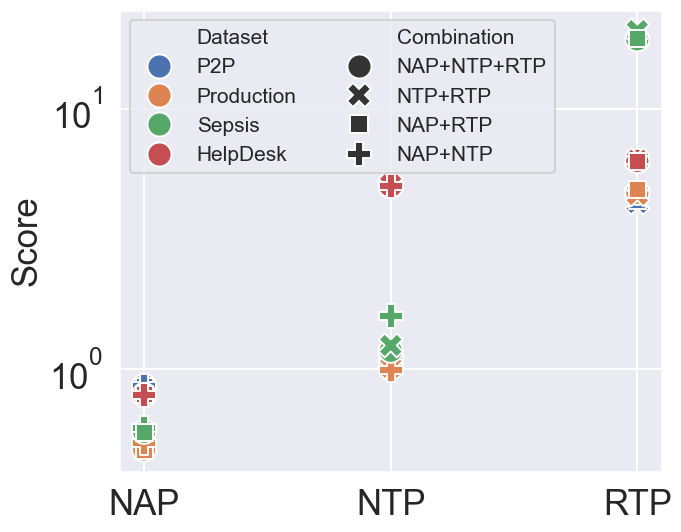

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your full DataFrame as described above

# Step 1: Normalize task names
def task_abbr(t):
    if t == 'next_activity': return 'NAP'
    if t == 'next_time': return 'NTP'
    if t == 'remaining_time': return 'RTP'

# Step 2: Expand rows to long format
records = []
for _, row in joint_df.iterrows():
    tasks = row['Tasks']
    dataset = row['Dataset']
    task_combi = ""
    if not pd.isna(row['NEXT_ACTIVITY_mean']):
        task_combi += 'NAP+'
    if not pd.isna(row['NEXT_TIME_mean']):
        task_combi += 'NTP+'
    if not pd.isna(row['REMAINING_TIME_mean']):
        task_combi += 'RTP'
    
    if task_combi[-1] == "+":
        task_combi = task_combi[:-1]
    
    if 'next_activity' in tasks and pd.notna(row['NEXT_ACTIVITY_mean']):
        records.append({
            'Task': 'NAP',
            'Score': row['NEXT_ACTIVITY_mean'],
            'Combination': task_combi,
            'Dataset': dataset
        })
    if 'next_time' in tasks and pd.notna(row['NEXT_TIME_mean']):
        records.append({
            'Task': 'NTP',
            'Score': row['NEXT_TIME_mean'],
            'Combination': task_combi,
            'Dataset': dataset
        })
    if 'remaining_time' in tasks and pd.notna(row['REMAINING_TIME_mean']):
        records.append({
            'Task': 'RTP',
            'Score': row['REMAINING_TIME_mean'],
            'Combination': task_combi,
            'Dataset': dataset
        })

# Step 3: Create long-form DataFrame
plot_df = pd.DataFrame(records)

# sns.set(style="whitegrid", context="paper", font_scale=1.2)
theme_context = "talk"
sns.set_theme(theme_context)
plt.figure(figsize=(7, 6))

ax = sns.scatterplot(
    data=plot_df,
    x='Task',
    y='Score',
    hue='Dataset',
    style='Combination',
    s=300,  # marker size
    # palette='Set2'
)

# use log scale
ax.set_yscale('log')

plt.ylabel('Score', fontsize=25)
plt.xlabel('', fontsize=25)

# increase fontsize of axis labels
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc='upper left', fontsize=15, ncol=2)
plt.savefig(f"Combination_Performance.pdf", bbox_inches="tight")
plt.show()